# Exam 17th of January 2025, 8.00-13.00 for the course 1MS041 (Introduction to Data Science / Introduktion till dataanalys)

## Instructions:
1. Complete the problems by following instructions.
2. When done, submit this file with your solutions saved, following the instruction sheet.

This exam has 3 problems for a total of 40 points, to pass you need
20 points. The bonus will be added to the score of the exam and rounded afterwards.

## Some general hints and information:
* Try to answer all questions even if you are uncertain.
* Comment your code, so that if you get the wrong answer I can understand how you thought
this can give you some points even though the code does not run.
* Follow the instruction sheet rigorously.
* This exam is partially autograded, but your code and your free text answers are manually graded anonymously.
* If there are any questions, please ask the exam guards, they will escalate it to me if necessary.

## Tips for free text answers
* Be VERY clear with your reasoning, there should be zero ambiguity in what you are referring to.
* If you want to include math, you can write LaTeX in the Markdown cells, for instance `$f(x)=x^2$` will be rendered as $f(x)=x^2$ and `$$f(x) = x^2$$` will become an equation line, as follows
$$f(x) = x^2$$
Another example is `$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$` which renders as
$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$

## Finally some rules:
* You may not communicate with others during the exam, for example:
    * You cannot ask for help in Stack-Overflow or other such help forums during the Exam.
    * You may not communicate with AI's, for instance ChatGPT.
    * Your on-line and off-line activity is being monitored according to the examination rules.

## Good luck!

In [94]:
# Insert your anonymous exam ID as a string in the variable below
examID=""


In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from scipy import optimize
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    confusion_matrix,
    precision_score,
    recall_score,
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


---
## Exam vB, PROBLEM 1
Maximum Points = 14


This problem is about SVD and anomaly detection. In all the problems where you are asked to produce a matrix or vector, they should be **numpy arrays**. 

1. [4p] Load the file `data/SVD.csv` as instructed in the code cell. Compute the Singular Value Decomposition, i.e. construct the three matrices $U$, $D$, $V$ such that if $X$ is the data matrix of shape `n_samples x n_dimensions` then $X = UDV^T$. Put the resulting matrices in their variables, check that the shapes align with the instructions in the code cell. Finally, extract the first right and left singular vectors and store those as 1-d arrays in the instructed variables.
2. [3p] The first goal is to calculate the explained variance, check the lecture notes for definition. Calculate the explained variance of using $1$, $2$,... number of singular vectors and select how many singular vectors are needed in order to explain at least $95\%$ of the variance.
3. [3p] With the number of components chosen in part 2, construct the best approximating matrix with the rank as the number of components. Explain what each row represents in the approximating matrix in terms of the original data, write your answer as free text in the Markdown cell below as instructed in the cells.
4. [4p] Create a vector which corresponds to the row-wise (Euclidean) distance between the original matrix `problem1_data`and the approximating matrix `problem1_approximation` and plot the empirical distribution function of that distance. Based on the empirical distribution function choose a threshold such that 10 samples are above it and the rest below. Store the 10 samples in the instructed variable.

-----
This problem is about SVD and anomaly detection. In all the problems where you are asked to produce a matrix or vector, they should be **numpy arrays**. 

1. [4p] Load the file `data/SVD.csv` as instructed in the code cell. Compute the Singular Value Decomposition, i.e. construct the three matrices $U$, $D$, $V$ such that if $X$ is the data matrix of shape `n_samples x n_dimensions` then $X = UDV^T$. Put the resulting matrices in their variables, check that the shapes align with the instructions in the code cell. Finally, extract the first right and left singular vectors and store those as 1-d arrays in the instructed variables.
-----

In [96]:
# Part 1: 4 points

# Load the data from the file data/SVD.csv and store the data in a numpy array called problem1_data below
# Double check that the numbers have been parsed correctly by checking the dtype of the array by calling problem1_data.dtype
problem1_data = pd.read_csv("data/SVD.csv", header=None).to_numpy()
# print(problem1_data)

U, s, VT = np.linalg.svd(problem1_data, full_matrices=False)

print(f"Shape of U: {U.shape} \nShape of s: {s.shape} \nShape of VT: {VT.shape}")

# The matrix of left singular vectors of problem1_data with shape n_samples x n_dimensions
problem1_U = U

# The vector of singular values of problem1_data with shape n_dimensions
problem1_D = np.diag(s)

# The matrix of right singular vectors of problem1_data with shape n_dimensions x n_dimensions
problem1_V = VT.T

print("\n")
print(f"Shape of U: {problem1_U.shape} \nShape of S: {problem1_D.shape} \nShape of V: {problem1_V.shape}")

# The first right singular vector of problem1_data with shape (n_dimensions,)
# hint sometimes one needs to invoke flatten() to avoid having shape (n_dimensions, 1) or (1, n_dimensions)
problem1_first_right_singular_vector = problem1_V[:, 0]

print("\n")
print(f"Shape of singular vectors: {problem1_first_right_singular_vector.shape}")
# The first left singular vector of problem1_data with shape (n_samples,)
# hint sometimes one needs to invoke flatten() to avoid having shape (n_samples, 1) or (1, n_samples)
problem1_first_left_singular_vector = problem1_U[:, 0]

print("\n")
print(f"Shape of singular vectors: {problem1_first_left_singular_vector.shape}")

#print(type(problem1_first_right_singular_vector))


Shape of U: (1010, 100) 
Shape of s: (100,) 
Shape of VT: (100, 100)


Shape of U: (1010, 100) 
Shape of S: (100, 100) 
Shape of V: (100, 100)


Shape of singular vectors: (100,)


Shape of singular vectors: (1010,)


-----
2. [3p] The first goal is to calculate the explained variance, check the lecture notes for definition. Calculate the explained variance of using $1$, $2$,... number of singular vectors and select how many singular vectors are needed in order to explain at least $95\%$ of the variance.
-----

In [97]:
# Part 2: 3 points

# Calculate the explained variance of using 1,2,3,...,n_dimensions singular values and store it as a numpy array called
# problem1_explained_variance below
# A numpy array of shape (n_dimensions,), it should be an increasing sequence of positive numbers
# and the last element should be 1


# This is the definition from lecture notes:
# Explained variance is how much percentage of the total variance is captured
# by our singular vectors. Remember the interpretation of the singular values
# as the standard deviation, as such the variance explained of the first k
# components is just the sum of the singular values squared and divided by
# the total variance.

# This is the cummulative explained variance which is what they wanted. 
variances = s**2 
problem1_explained_variance = np.cumsum(variances) / np.sum(variances)

k = 0

# This is just a function to find how many K we need to reconstruct with 95% variance. 
# One could also simply just look at the print of the problem1_explained_variance and see where
# we meet the threshold and calculate the amount of components we needed. 
for i in range(len(problem1_explained_variance)):
    # print("Loop")
    if problem1_explained_variance[i] >= 0.95:
        k += 1
        break
    else: 
        k += 1
        
print(f"We need {k} number of components to achieve 95%")

# print(f"This is the explained variance: {problem1_explained_variance}")
# print(f"This is the shape of the explained variance: {problem1_explained_variance.shape}")


# Store in the variable below the smallest number of singular values needed
# to explain at least 95% of the variance
problem1_num_components = 10


We need 10 number of components to achieve 95%


-----
3. [3p] With the number of components chosen in part 2, construct the best approximating matrix with the rank as the number of components. Explain what each row represents in the approximating matrix in terms of the original data, write your answer as free text in the Markdown cell below as instructed in the cells.
-----

In [98]:
# Part 3: 3 points

# Calculate the approximating matrix of problem1_data using the first 
# problem1_num_components singular values and store it in the variable below
# A numpy array of shape n_samples x n_dimensions

reconstruct = U[:, :k] @ np.diag(s[:k]) @ VT[:k, :]
print(reconstruct.shape)

problem1_approximation = reconstruct


(1010, 100)



## Free text answer

Put the explanation for **part 3** of the rows of the approximating matrix below this line in this cell. In order to enter edit mode you can doubleclick this cell or select it and just press enter.

I looked at wikipedia and old posts stack overflow to solve the problem. What does each row represent in the matrix? Each row represents the results of a multiplication between right and left singular vector values with singular values.

-----
4. [4p] Create a vector which corresponds to the row-wise (Euclidean) distance between the original matrix `problem1_data`and the approximating matrix `problem1_approximation` and plot the empirical distribution function of that distance. Based on the empirical distribution function choose a threshold such that 10 samples are above it and the rest below. Store the 10 samples in the instructed variable.
-----

(1010,)


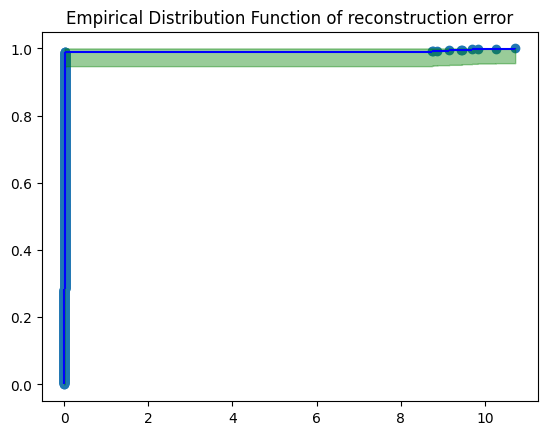

Problem1_threshold: 0.02203521604468554
(10, 100)


In [99]:
# ------------------------------------------------------------
# Part 4: 4 points
# ------------------------------------------------------------
# This part computes the reconstruction error of each sample,
# visualizes its empirical distribution, and selects outliers
# based on the largest reconstruction errors.
# ------------------------------------------------------------

# Alias the original data matrix and its low-rank SVD approximation
# Both have shape (n_samples, n_dimensions)
original = problem1_data
approximation = problem1_approximation


# ------------------------------------------------------------
# Compute row-wise reconstruction error
# ------------------------------------------------------------
# np.linalg.norm(..., axis=1) computes the Euclidean (L2) norm
# across columns for each row:
#
# For each sample i:
#   error_i = || original[i] - approximation[i] ||_2
#
# The result is a 1D NumPy array of length n_samples.
#
# Reminder:
#   X.shape == (n_rows, n_columns)
#   axis=0 → operate column-wise (down the rows)
#   axis=1 → operate row-wise (across the columns)
problem1_reconstruction_error = np.linalg.norm(original - approximation, axis=1)

# Sanity check: should be (n_samples,)
print(problem1_reconstruction_error.shape)


# ------------------------------------------------------------
# Build and plot the empirical distribution function (EDF)
# ------------------------------------------------------------

from Utils import makeEDF, plotEDF

# Sort the reconstruction errors (required for EDF construction)
sorted_errors = np.sort(problem1_reconstruction_error)

# Build the empirical distribution function:
# Column 0: error values
# Column 1: cumulative frequencies (EDF values)
edf_residuals = makeEDF(sorted_errors)

# Plot the EDF together with a 95% DKW confidence band
plotEDF(
    edf_residuals,
    confidence_band=True,
    alpha=0.95,
    title="Empirical Distribution Function of reconstruction error"
)

# Optional check:
# print(f"EDF shape: {edf_residuals.shape}")  # (n_samples, 2)


# ------------------------------------------------------------
# Choose threshold so that exactly 10 samples are above it
# ------------------------------------------------------------
# sorted_errors[-1]  -> largest error
# sorted_errors[-11] -> 11th largest error
#
# Choosing this value ensures that exactly 10 reconstruction
# errors are strictly larger than the threshold.
problem1_threshold = sorted_errors[-11]
print(f"Problem1_threshold: {problem1_threshold}")


# ------------------------------------------------------------
# Extract the outlier samples
# ------------------------------------------------------------
# Select rows of the original data whose reconstruction error
# exceeds the chosen threshold.
# The result should have shape (10, n_dimensions).
errs = problem1_reconstruction_error
problem1_outliers = problem1_data[errs > problem1_threshold]

# Sanity check: should be (10, n_dimensions)
print(problem1_outliers.shape)


---
## Exam vB, PROBLEM 2
Maximum Points = 14


In this problem we have data consisting of user behavior on a website. The pages of the website are just numbers in the dataset $0,1,2,\ldots$ and each row consists of a user, a source and a destination page. This signifies that the user was on the source page and clicked a link leading them to the destination page. The goal is to improve the user experience by decreasing load time of the next page visited, as such we need a good estimate for the next site likely to be visited. We will model this using a homogeneous Markov chain, each row in the data-file then corresponds to a single realization of a transition. 

1. [3p] Load the data in the file `data/websites.csv` and construct a matrix of size `n_pages x n_pages` which is the maximum likelihood estimate of the true transition matrix for the Markov chain. Here the ordering of the states are exactly the ones in the data-file, that is page $0$ has index $0$ in the matrix.
2. [4p] A page loads in $\text{Exp}(1)$ (Exponentially distributed with mean $1$) seconds if not preloaded and loads with $\text{Exp}(10)$ (Exponentially distributed with mean $1/10$) seconds if preloaded and we only preload the most likely next site. Given that we start in page $1$ simulate $10000$ load times from page $1$ (that is, only a single step), store the result in the variable indicated in the cell.
Repeat the experiment but this time preload the two most likely pages and store the result in the indicated variable.
3. [3p] Compare the average (empirical) load time from part 2 with the theoretical one of no pre-loading. Does the load time improve, how did you come to this conclusion? (Explain in the free text field).
4. [4p] Calculate the stationary distribution of the Markov chain and calculate the expected load time with respect to it. 

-----

In this problem we have data consisting of user behavior on a website. The pages of the website are just numbers in the dataset $0,1,2,\ldots$ and each row consists of a user, a source and a destination page. This signifies that the user was on the source page and clicked a link leading them to the destination page. The goal is to improve the user experience by decreasing load time of the next page visited, as such we need a good estimate for the next site likely to be visited. We will model this using a homogeneous Markov chain, each row in the data-file then corresponds to a single realization of a transition. 

1. [3p] Load the data in the file `data/websites.csv` and construct a matrix of size `n_pages x n_pages` which is the maximum likelihood estimate of the true transition matrix for the Markov chain. Here the ordering of the states are exactly the ones in the data-file, that is page $0$ has index $0$ in the matrix.


In [100]:
# Part 1: 3 points

# Load the data from the file data/websites.csv and estimate the transition matrix of the Markov chain
# Store the estimated transition matrix in the variable problem2_transition_matrix below
# A numpy array of shape (problem2_n_states, problem2_n_states)

data = pd.read_csv("data/websites.csv")
# print(data.head(5))

# This is how to determine the size of the matrix, i.e. the number of states it should have: 
source_values = data["source"].values
destination_values = data["destination"].values

source_min_val = source_values.min()
source_max_val = source_values.max()

destination_min_val = destination_values.min()
destination_max_val = destination_values.max()

# print(f"Source min val: {source_min_val} Source max val: {source_max_val} \nDestination min val: {destination_min_val} Destination max val: {destination_max_val}")

n_states = 10
# The print statement ensured us that the matrix should be 10x10, since 0-9 is 10 values. 

counts = np.zeros((n_states, n_states))
# print(counts) => Only zeros which is good!
# print(counts.shape) => 10x10

# Now we have to iterate through the dataset that we have and then calculate each count from 
# source -> destination and increment that into the counts matrix!
# In order to iterate through the data, use iterrows, this is the example of how to use it: 
# students = {"Name": ["Mary", "Joseph"], "Age": [25, 30]}
# students = pd.DataFrame(students)

# for index, row in students.iterrows():
#     print(f"Index: {index}, Name: {row['Name']}, Age: {row['Age']}")
    
# Output =      Index: 0, Name: Mary, Age: 25
#               Index: 1, Name: Joseph, Age: 30

# SO: 
for index, row in data.iterrows():
    source = row["source"]
    destination = row["destination"]
    counts[source, destination] += 1 

#print(f"This is the counts matrix right now after insertion: \n {counts}")

# In order to calculate the transition matrix, we simply need to sum up each row in the matrix, 
# then we simply divide each value in the row,column id with the total sum for that column. 

stationary = counts
# print(stationary)

for i in range(n_states):
    #print(stationary[i])
    row_sum = sum(stationary[i])
    #print(row_sum)
    for j in range(n_states):
        if (stationary[i, j] == 0):
            stationary[i, j] = 0
        else:
            stationary[i, j] = stationary[i, j] / row_sum

problem2_transition_matrix = stationary

print(f"This is the transition matrix:\n {problem2_transition_matrix}")

# Store the number of states in the variable problem2_n_states below
problem2_n_states = n_states

# This is just a check so that the transition matrix rows adds up to 1:
for i in range(n_states):
    row_sum = problem2_transition_matrix[i].sum()
    if np.isclose(row_sum, 1.0):
        print("True")
    else:
        print("False")
    

This is the transition matrix:
 [[0.         0.26506024 0.         0.12048193 0.04819277 0.01204819
  0.08433735 0.10843373 0.15662651 0.20481928]
 [0.1015625  0.         0.09375    0.2109375  0.015625   0.234375
  0.125      0.140625   0.03125    0.046875  ]
 [0.20652174 0.13043478 0.         0.11956522 0.15217391 0.17391304
  0.02173913 0.         0.04347826 0.15217391]
 [0.00943396 0.09433962 0.19811321 0.         0.0754717  0.06603774
  0.14150943 0.19811321 0.         0.21698113]
 [0.18055556 0.16666667 0.11111111 0.13888889 0.         0.09722222
  0.16666667 0.05555556 0.02777778 0.05555556]
 [0.00980392 0.18627451 0.02941176 0.05882353 0.15686275 0.
  0.15686275 0.01960784 0.17647059 0.20588235]
 [0.03478261 0.06086957 0.17391304 0.07826087 0.         0.13913043
  0.         0.13913043 0.23478261 0.13913043]
 [0.16129032 0.05376344 0.01075269 0.12903226 0.08602151 0.03225806
  0.21505376 0.         0.17204301 0.13978495]
 [0.14285714 0.11904762 0.14285714 0.04761905 0.07142857 0

2. [4p] A page loads in $\text{Exp}(1)$ (Exponentially distributed with mean $1$) seconds if not preloaded and loads with $\text{Exp}(10)$ (Exponentially distributed with mean $1/10$) seconds if preloaded and we only preload the most likely next site. Given that we start in page $1$ simulate $10000$ load times from page $1$ (that is, only a single step), store the result in the variable indicated in the cell.
Repeat the experiment but this time preload the two most likely pages and store the result in the indicated variable.


In [113]:
# ------------------------------------------------------------
# Part 2: Simulating page load times with preloading
# ------------------------------------------------------------

# We start from page 1.
# Indexing starts at 0, so page "1" corresponds to index 1.
start_page = 1

# Number of users we simulate (each user makes one page transition)
load_pages = 10000

# Number of pages (states in the Markov chain).
# .shape[0] gives the number of rows in the transition matrix,
# which equals the number of pages.
n_states = problem2_transition_matrix.shape[0]

# Extract the transition probabilities FROM the start page.
# This is a 1D array where:
#   - index i   = destination page i
#   - value     = probability of moving to page i
transition_probs = problem2_transition_matrix[start_page]

# ------------------------------------------------------------
# Finding which pages to preload
# ------------------------------------------------------------

# np.argmax(array):
# - looks through the array
# - finds the LARGEST value
# - returns the INDEX of that value
#
# Here:
# - we find which page has the highest transition probability
top1_page = np.argmax(transition_probs)

# np.argsort(array):
# - sorts the array from smallest to largest
# - BUT returns the INDICES that would sort the array
#
# Example:
# array = [0.2, 0.5, 0.1]
# np.argsort(array) -> [2, 0, 1]
#
# The last two indices correspond to the two largest probabilities
top2_pages = np.argsort(transition_probs)[-2:]

# ------------------------------------------------------------
# 1) Simulation when ONLY the most likely page is preloaded
# ------------------------------------------------------------

# np.random.choice:
# - randomly selects values from {0, 1, ..., n_states-1}
# - each value is chosen according to probabilities in p
#
# In simple terms:
# - this simulates where each user goes next
# - according to the Markov transition probabilities
next_pages_top = np.random.choice(
    n_states,              # possible pages: 0, 1, ..., n_states-1
    size=load_pages,       # number of users (samples)
    p=transition_probs     # probability of choosing each page
)

# (next_pages_top == top1_page):
# - compares each sampled page with the preloaded page
# - returns True if equal, False otherwise
#
# Result:
# - a Boolean array telling us which users got a preloaded page
is_preloaded_top = (next_pages_top == top1_page)

# np.random.exponential(scale=1.0):
# - draws samples from an exponential distribution
# - 'scale' is the MEAN of the distribution
#
# scale = 1.0  -> Exp(1), mean load time = 1 second
not_preloaded = np.random.exponential(scale=1.0, size=load_pages)

# scale = 0.1 -> Exp(10), mean load time = 0.1 seconds
# (preloading makes the page load much faster)
preloaded = np.random.exponential(scale=0.1, size=load_pages)

# np.where(condition, x, y):
# - looks at each position in 'condition'
# - if True  -> take value from x
# - if False -> take value from y
#
# Here:
# - if page was preloaded -> fast load time
# - else                 -> slow load time
problem2_page_load_times_top = np.where(
    is_preloaded_top,
    preloaded,
    not_preloaded
)

# ------------------------------------------------------------
# 2) Simulation when the TWO most likely pages are preloaded
# ------------------------------------------------------------

# Sample next pages again for a NEW experiment
next_pages_two = np.random.choice(
    n_states,
    size=load_pages,
    p=transition_probs
)

# np.isin(a, b):
# - checks element-by-element if values in 'a' are present in 'b'
# - returns True if the value exists in b, False otherwise
#
# Here:
# - True if the next page is one of the two preloaded pages
is_preloaded_two = np.isin(next_pages_two, top2_pages)

# Generate load times again
not_preloaded2 = np.random.exponential(scale=1.0, size=load_pages)
preloaded2 = np.random.exponential(scale=0.1, size=load_pages)

# Assign load times using the same logic as before
problem2_page_load_times_two = np.where(
    is_preloaded_two,
    preloaded2,
    not_preloaded2
)

# ------------------------------------------------------------
# Optional sanity checks
# ------------------------------------------------------------

# Print which pages were preloaded
print("Top-1 preloaded page:", top1_page)
print("Top-2 preloaded pages:", top2_pages)

# Mean load times:
# Preloading two pages should reduce the average load time
print("Mean load time (top-1):", problem2_page_load_times_top.mean())
print("Mean load time (top-2):", problem2_page_load_times_two.mean())



# np.argmax → “Which page is most likely?”
# np.argsort → “Which pages are the most likely in order?”
# np.random.choice → “Simulate where users go next”
# np.isin → “Was this page preloaded?”
# np.where → “Choose fast or slow load time”
# Exponential distribution → “Models random waiting times”

Top-1 preloaded page: 5
Top-2 preloaded pages: [3 5]
Mean load time (top-1): 0.8099709884726354
Mean load time (top-2): 0.6051907821651749


3. [3p] Compare the average (empirical) load time from part 2 with the theoretical one of no pre-loading. Does the load time improve, how did you come to this conclusion? (Explain in the free text field).


In [114]:
# ------------------------------------------------------------
# Part 3: Compare empirical and theoretical average load times
# ------------------------------------------------------------

# If NO page is preloaded, every page load time follows Exp(1),
# i.e. an exponential distribution with rate 1.
# The expected value of an Exp(lambda) random variable is:
#     E[T] = 1 / lambda
# Here lambda = 1, so the theoretical expected load time is exactly 1 second.
problem2_avg = 1.0


# We now compare this theoretical average (no pre-loading)
# with the EMPIRICAL average load time obtained in Part 2
# when pre-loading the most likely next page.
#
# problem2_page_load_times_top contains 10,000 simulated load times.
# Taking the mean gives an estimate of the expected load time
# under pre-loading.
#
# If the theoretical mean (1.0) is larger than the empirical mean,
# then pre-loading improves the expected load time.
problem2_comparison = problem2_avg > np.mean(problem2_page_load_times_top)

print("This is the mena of problem2_page_load_times_top: ", np.mean(problem2_page_load_times_top))

# This boolean answers the question directly:
# True  -> pre-loading improves load time
# False -> no improvement observed
problem2_comparison


This is the mena of problem2_page_load_times_top:  0.8099709884726354


np.True_

### Explanation (Part 3)

If no page is preloaded, the load time of every page follows an exponential distribution with rate $\lambda = 1$, denoted $\mathrm{Exp}(1)$. The expected value of an exponential random variable with rate $\lambda$ is given by
$$
\mathbb{E}[T] = \frac{1}{\lambda}.
$$
Therefore, in the case of no preloading, the theoretical expected load time is
$$
\mathbb{E}[T_{\text{no preload}}] = 1 \text{ second}.
$$

When preloading is used, the load time depends on whether the next visited page was preloaded. If the page is preloaded, the load time follows an $\mathrm{Exp}(10)$ distribution with mean $1/10$ seconds; otherwise, it follows an $\mathrm{Exp}(1)$ distribution with mean $1$ second. This results in a mixture of exponential distributions.

To estimate the expected load time under preloading, we simulate $10{,}000$ users starting from page 1 and compute the empirical mean of the simulated load times. By the law of large numbers, this empirical mean approximates the true expected load time.

Since the empirical average load time with preloading is smaller than the theoretical average load time of $1$ second without preloading, we conclude that preloading improves the expected page load time.


4. [4p] Calculate the stationary distribution of the Markov chain and calculate the expected load time with respect to it. 

In [ ]:
import numpy as np

# ------------------------------------------------------------
# Part 4.1: Stationary distribution via eigenvector of P^T
# ------------------------------------------------------------
# A stationary distribution pi satisfies:
#   pi P = pi
# Equivalently, pi^T is a right eigenvector of P^T with eigenvalue 1.
# ------------------------------------------------------------

# Transition matrix and number of states
P = problem2_transition_matrix
n = problem2_n_states

# Compute eigenvalues and eigenvectors of the transpose P^T
# We use P^T because we want a LEFT eigenvector of P
eigvals, eigvecs = np.linalg.eig(P.T)

# Find the index of the eigenvalue that is closest to 1
# (due to numerical precision, it may not be exactly 1)
idx = np.argmin(np.abs(eigvals - 1.0))

# Extract the corresponding eigenvector
# Eigenvectors may be complex due to numerical reasons,
# but the stationary distribution is real, so we take the real part
pi = np.real(eigvecs[:, idx])

# The eigenvector is only defined up to a multiplicative constant
# (and sign), so if the sum is negative we flip the sign
if pi.sum() < 0:
    pi = -pi

# Due to numerical noise, some entries may be very small negatives.
# We clamp them to zero and normalize so the distribution sums to 1.
pi = np.maximum(pi, 0.0)
pi = pi / pi.sum()

# Store the stationary distribution
problem2_stationary_distribution = pi  # shape (n,)

# ------------------------------------------------------------
# Part 4.2: Expected load time under stationary distribution
# ------------------------------------------------------------
# We assume that from each current page i, we preload the single
# most likely next page according to the transition probabilities.
# ------------------------------------------------------------

# For each page i, find the index of the most likely next page
top_next = np.argmax(P, axis=1)  # shape (n,)

# For each page i, extract the probability that the next page
# equals the preloaded (most likely) one
p_preloaded = P[np.arange(n), top_next]  # shape (n,)

# Expected load time starting from page i:
# - With probability p_preloaded[i], the page is preloaded:
#       load time ~ Exp(10) with mean 0.1
# - With probability 1 - p_preloaded[i], it is not preloaded:
#       load time ~ Exp(1) with mean 1.0
#
# Therefore:
#   E[T | i] = 0.1 * p_preloaded[i] + 1.0 * (1 - p_preloaded[i])
#            = 1 - 0.9 * p_preloaded[i]
expected_time_given_i = 1.0 - 0.9 * p_preloaded  # shape (n,)

# Expected load time under the stationary distribution:
#   E[T] = sum_i pi_i * E[T | i]
problem2_avg_stationary = float(problem2_stationary_distribution @ expected_time_given_i)

# Optional prints for inspection
print("Stationary distribution: \n", problem2_stationary_distribution)
print("Stationary expected loading time: ", problem2_avg_stationary)


---
## Exam vB, PROBLEM 3
Maximum Points = 12


In this problem we are interested in fraud detection in an e-commerce system. In this problem we are given the outputs of a classifier that predicts the probabilities of fraud, your goal is to explore the threshold choice as in individual assignment 4. The costs associated with the predictions are:

* **True Positive (TP)**: Detecting fraud and blocking the transaction costs the company 100 (manual review etc.)
* **True Negative (TN)**: Allowing a legitimate transaction has no cost.
* **False Positive (FP)**: Incorrectly classifying a legitimate transaction as fraudulent costs 120 (customer dissatisfaction plus operational expenses for reversing the decision).
* **False Negative (FN)**: Missing a fraudulent transaction costs the company 600 (e.g., fraud loss plus potential reputational damage or penalties).

**The code cells contain more detailed instructions, THE FIRST CODE CELL INITIALIZES YOUR VARIABLES**

1. [3p] Complete filling the function `cost` to compute the average cost of a prediction model under a certain prediction threshold. Plot the cost as a function of the threshold (using the validation data provided in the first code cell of this problem), between 0 and 1 with 0.01 increments.
2. [2.5p] Find the threshold that minimizes the cost and calculate the cost at that threshold on the validation data. Also calculate the precision and recall at the optimal threshold on the validation data on class 1 and 0.
3. [2.5p] Repeat step 2, but this time find the best threshold to minimize the $0-1$ loss. Calculate the difference in cost between the threshold found in part 2 with the one just found in part 3.
4. [4p] Provide a confidence interval around the optimal cost (with $95\%$ confidence) applied to the test data and explain all the assumption you made.

In [ ]:

# RUN THIS CELL TO GET THE DATA

# We start by loading the data

import pandas as pd

PROBLEM3_DF = pd.read_csv('data/fraud.csv')
Y = PROBLEM3_DF['Class'].values
X = PROBLEM3_DF[['V%d' % i for i in range(1,5)]+['Amount']].values

# We will split the data into training, testing and validation sets
from Utils import train_test_validation
PROBLEM3_X_train, PROBLEM3_X_test, PROBLEM3_X_val, PROBLEM3_y_train, PROBLEM3_y_test, PROBLEM3_y_val = train_test_validation(X,Y,shuffle=True,random_state=1)

# From this we will train a logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(PROBLEM3_X_train,PROBLEM3_y_train)

# THE FOLLOWING CODE WILL PRODUCE THE ARRAYS YOU NEED FOR THE PROBLEM

PROBLEM3_y_pred_proba_val = lr.predict_proba(PROBLEM3_X_val)[:,1]
PROBLEM3_y_true_val = PROBLEM3_y_val

PROBLEM3_y_pred_proba_test = lr.predict_proba(PROBLEM3_X_test)[:,1]
PROBLEM3_y_true_test = PROBLEM3_y_test

-----

In this problem we are interested in fraud detection in an e-commerce system. In this problem we are given the outputs of a classifier that predicts the probabilities of fraud, your goal is to explore the threshold choice as in individual assignment 4. The costs associated with the predictions are:

* **True Positive (TP)**: Detecting fraud and blocking the transaction costs the company 100 (manual review etc.)
* **True Negative (TN)**: Allowing a legitimate transaction has no cost.
* **False Positive (FP)**: Incorrectly classifying a legitimate transaction as fraudulent costs 120 (customer dissatisfaction plus operational expenses for reversing the decision).
* **False Negative (FN)**: Missing a fraudulent transaction costs the company 600 (e.g., fraud loss plus potential reputational damage or penalties).

**The code cells contain more detailed instructions, THE FIRST CODE CELL INITIALIZES YOUR VARIABLES**

1. [3p] Complete filling the function `cost` to compute the average cost of a prediction model under a certain prediction threshold. Plot the cost as a function of the threshold (using the validation data provided in the first code cell of this problem), between 0 and 1 with 0.01 increments.


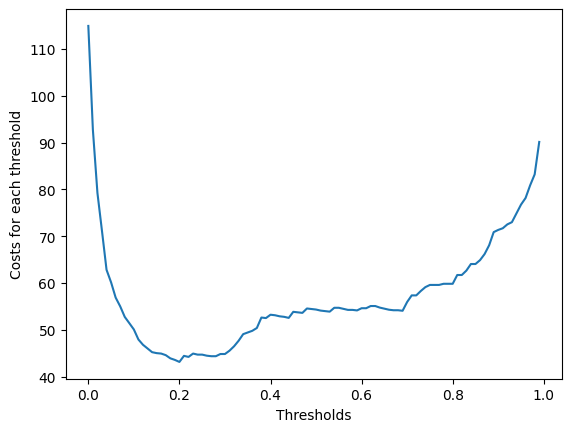

In [ ]:
# Part 1: 3 points

# Implement the following function that calculates the cost of a binary classifier according to
# the specification in the problem statement
# See the comments inside the function for details of the parameters
def cost(y_true, y_predict_proba, threshold):
    # y_true is a numpy array of shape (n_samples,) with binary labels
    # y_predict_proba is a numpy array of shape (n_samples,) with predicted probabilities
    # threshold is a float between 0 and 1

    # When returning the cost, you should return the average cost per sample
    # thus it should be a value
    y_pred = (y_predict_proba >= threshold).astype(int)
    
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    
    tp_cost = 100
    tn_cost = 0
    fp_cost = 120
    fn_cost = 600
    
    n = len(y_true)
    total_cost = ((tp * tp_cost) + (tn * tn_cost) + (fp * fp_cost) + (fn * fn_cost))
    return total_cost / n  # A float

thresholds = np.arange(0, 1.01, 0.01)
costs = []

for t in thresholds:
    problem1_cost = cost(PROBLEM3_y_true_val, PROBLEM3_y_pred_proba_val, t)
    costs.append(problem1_cost)

# Provide the code below to plot the cost as a function of the threshold
# using the validation data, specifically the arrays PROBLEM3_y_true_val and PROBLEM3_y_pred_proba_val.
# The plot should be between 0 and 1 with 0.01 increments
# The y-axis should be the cost and the x-axis should be the threshold

plt.plot(thresholds, costs)
plt.xlabel("Thresholds")
plt.ylabel("Costs for each threshold")
plt.show()

2. [2.5p] Find the threshold that minimizes the cost and calculate the cost at that threshold on the validation data. Also calculate the precision and recall at the optimal threshold on the validation data on class 1 and 0.


In [ ]:
# Part 2: 2.5 points

# Use the cost function you just implemented above to find the threshold that minimizes the cost
# using the validation data, specifically the arrays PROBLEM3_y_true_val and PROBLEM3_y_pred_proba_val.
# Store the threshold in the variable below

best_t = 0
best_cost = np.inf
thresholds = np.arange(0, 1.01, 0.01)

for t in thresholds:
    true_cost = cost(PROBLEM3_y_true_val, PROBLEM3_y_pred_proba_val, t)
    
    if (true_cost < best_cost):
        best_cost = true_cost
        best_t = t
print(f"This is the best threshold found: {best_t} with this cost found: {best_cost}")

problem3_threshold = best_t  # A float between 0 and 1

# Now calculate the cost of the classifier using the validation data and the threshold you just found
# using the validation data, specifically the arrays PROBLEM3_y_true_val and PROBLEM3_y_pred_proba_val.
# Store the cost in the variable below

# This is also just the same as best_cost variable:
problem3_cost_val = cost(PROBLEM3_y_true_val, PROBLEM3_y_pred_proba_val, best_t)  # A float

print(f"Best cost at best threshold: {problem3_cost_val}")

# Using the threshold you just found, calculate the predicted labels of the classifier
# on the validation data and put the predicted labels in the variable below
# A numpy array of shape (n_samples,) with values 0 or 1
problem3_y_pred_val = (PROBLEM3_y_pred_proba_val >= problem3_threshold).astype(int)

# Calculate the precision and recall of the classifier of class 1 using the threshold you just found
# Store in the variables below (floats between 0 and 1)



problem3_precision_1 = precision_score(PROBLEM3_y_true_val, problem3_y_pred_val, pos_label=1)
problem3_recall_1 = recall_score(PROBLEM3_y_true_val, problem3_y_pred_val, pos_label=1)

# Calculate the precision and recall of the classifier of class 0 using the threshold you just found
# Store in the variables below (floats between 0 and 1)
problem3_precision_0 = precision_score(PROBLEM3_y_true_val, problem3_y_pred_val, pos_label=0)
problem3_recall_0 = recall_score(PROBLEM3_y_true_val, problem3_y_pred_val, pos_label=0)

print(f"Precision 0: {problem3_precision_0} \nPrecision 1: {problem3_precision_1} \nRecall 0: {problem3_recall_0} \nRecall 1: {problem3_recall_1}")


This is the best threshold found: 0.2 with this cost found: 43.15492957746479
Best cost at best threshold: 43.15492957746479
Precision 0: 0.9695767195767195 
Precision 1: 0.7961165048543689 
Recall 0: 0.9208542713567839 
Recall 1: 0.9144981412639405


3. [2.5p] Repeat step 2, but this time find the best threshold to minimize the $0-1$ loss. Calculate the difference in cost between the threshold found in part 2 with the one just found in part 3.


In [ ]:
# Part 3: 2.5 points

import numpy as np

thresholds_01 = np.arange(0, 1.01, 0.01)

best_01_t = 0.0
best_01_loss = np.inf

for t in thresholds_01:
    # predicted labels at threshold t
    y_pred = (PROBLEM3_y_pred_proba_val >= t).astype(int)

    # 0-1 loss = misclassification rate
    loss01 = np.mean(y_pred != PROBLEM3_y_true_val)

    if loss01 < best_01_loss:
        best_01_loss = loss01
        best_01_t = t

problem3_threshold_01 = best_01_t  # threshold minimizing 0-1 loss (validation)

# --- difference in COST between part 2 threshold and part 3 threshold ---

# part 2 threshold (min-cost) should already be stored as problem3_threshold
cost_at_part2_threshold = cost(PROBLEM3_y_true_val, PROBLEM3_y_pred_proba_val, problem3_threshold)

# cost at part 3 threshold (min 0-1 loss)
cost_at_part3_threshold = cost(PROBLEM3_y_true_val, PROBLEM3_y_pred_proba_val, problem3_threshold_01)

problem3_cost_difference = abs(cost_at_part2_threshold - cost_at_part3_threshold)

print("Threshold (min cost):", problem3_threshold)
print("Threshold (min 0-1 loss):", problem3_threshold_01)
print("0-1 loss at min-0-1 threshold:", best_01_loss)
print("Cost at min-cost threshold:", cost_at_part2_threshold)
print("Cost at min-0-1 threshold:", cost_at_part3_threshold)
print("Difference in cost:", problem3_cost_difference)


Threshold (min cost): 0.2
Threshold (min 0-1 loss): 0.6900000000000001
0-1 loss at min-0-1 threshold: 0.0647887323943662
Cost at min-cost threshold: 43.15492957746479
Cost at min-0-1 threshold: 54.08450704225352
Difference in cost: 10.929577464788728


4. [4p] Provide a confidence interval around the optimal cost (with $95\%$ confidence) applied to the test data and explain all the assumption you made.

In [ ]:
# Part 4: 4 points

# Using the threshold problem3_threshold use Hoeffding's inequality to provide a confidence interval
# for the cost of the classifier with 95 % confidence using the test data.
# Specifically the arrays PROBLEM3_y_true_test and PROBLEM3_y_pred_proba_test.
# Store the lower and upper bounds of the confidence interval in the variables below

a,b = 0, 600
alpha = 0.05
n = len(PROBLEM3_y_true_test)

cost_test_data = cost(PROBLEM3_y_true_test, PROBLEM3_y_pred_proba_test, problem3_threshold)

epsilon = (b-a) * np.sqrt(np.log(alpha/2) / (-2*n))

lower = (cost_test_data - epsilon)
upper = (cost_test_data + epsilon)

problem3_lower_bound = lower  # A float
problem3_upper_bound = upper  # A float

print(f"This is lower bound: {problem3_lower_bound} \nThis is upper bound: {problem3_upper_bound}")

This is lower bound: 17.734792363077773 
This is upper bound: 67.67365834114759



## Free text answer

Put your explanation for part 4 below this line in this **cell**. Doubleclick to enter edit mode as before.


### Explanation of assumptions for Part 4

To construct a $95\%$ confidence interval for the expected cost on the test data, Hoeffding’s inequality was used. This approach relies on the following assumptions:

1. **Bounded per-sample cost**  
   Each individual prediction incurs a finite cost. From the problem specification, the possible costs per sample are:
   - True Negative: $0$
   - True Positive: $100$
   - False Positive: $120$
   - False Negative: $600$  
   Hence, the per-sample cost random variable is bounded in the interval $[0, 600]$.

2. **Independent and identically distributed samples (i.i.d.)**  
   The test data samples are assumed to be independent and drawn from the same underlying distribution. This is required for Hoeffding’s inequality to hold.

3. **Fixed decision threshold**  
   The threshold used to compute the test cost was selected using the validation data and is treated as fixed when evaluating performance on the test set. The uncertainty in threshold selection is therefore not accounted for in the confidence interval.

4. **Average cost as a sample mean**  
   The reported test cost is the empirical mean of the per-sample costs. Hoeffding’s inequality provides a confidence interval for this mean without making any assumptions about the underlying distribution of the costs.

5. **Distribution-free guarantee**  
   No assumptions such as normality of the cost distribution are made. Hoeffding’s inequality is distribution-free, but this also means that the resulting confidence interval may be conservative.

Under these assumptions, the constructed interval contains the true expected test cost with probability at least $95\%$.
